In [6]:
import pandas as pd
import numpy as np
import nltk
import sklearn as sk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
import re
from bs4 import BeautifulSoup
import contractions
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import platform 
import torch
import sys
from sklearn.metrics import mean_squared_error
import spacy
import collections

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/geetshingi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/geetshingi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/geetshingi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
has_gpu = torch.cuda.is_available()
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")
    
import warnings 
warnings.filterwarnings("ignore")

Python Platform: macOS-13.2.1-arm64-arm-64bit
PyTorch Version: 2.0.0.dev20230212

Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.1
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [8]:
df = pd.read_csv('text_data_nathan.csv', usecols = ['Utterance', 'Label'])
df.head()

,Utterance,Label
0,Okay.,"fo_o_fw_""_by_bc"
1,"All right, uh,",b
2,feelings on what caused the S and L crisis,sd
3,I guess I don't have a real technical knowledg...,sd
4,I gather that there where large numbers of sit...,sd


In [9]:
counts = collections.Counter(df['Label'])

In [10]:
counts_list = []

In [11]:
for key in counts:
    counts_list.append((key, counts[key]))

In [12]:
counts_list.sort(key = lambda x: x[1], reverse = True)

In [13]:
labels = [x for x, y in counts_list]
freqs = [y for x, y in counts_list]

In [14]:
print(labels)

['sd', 'b', 'sv', '%', 'aa', 'ba', 'qy', 'ny', 'fc', 'qw', 'nn', 'bk', 'h', 'qy^d', 'bh', '^q', 'bf', 'fo_o_fw_"_by_bc', 'na', 'ad', '^2', 'b^m', 'qo', 'qh', '^h', 'ar', 'ng', 'br', 'no', 'fp', 'qrr', 'arp_nd', 't3', 'oo_co_cc', 'aap_am', 't1', 'bd', '^g', 'qw^d', 'fa', 'ft']


In [15]:
print(freqs)

[75136, 38281, 26421, 15195, 11123, 4757, 4725, 3030, 2581, 1976, 1374, 1306, 1226, 1218, 1053, 983, 952, 879, 847, 745, 723, 687, 656, 575, 556, 344, 302, 298, 284, 225, 209, 207, 117, 110, 104, 103, 103, 92, 80, 79, 78]


In [16]:
total = sum(freqs)
freqs = [x/total for x in freqs]

In [17]:
print(df['Label'].unique())

['fo_o_fw_"_by_bc' 'b' 'sd' 'bf' 'aa' 'qy' 'nn' 'sv' '%' 'b^m' '^q' 'qy^d'
 'no' 'qrr' 'bk' 'ny' 'ba' 'h' 'br' '^2' 'qo' 'ad' 'qh' 'aap_am' 'bh' 'qw'
 '^h' 'oo_co_cc' 'na' 'fa' 'fc' 'qw^d' 'ng' 'ft' 't3' 'ar' 't1' 'fp' '^g'
 'arp_nd' 'bd']


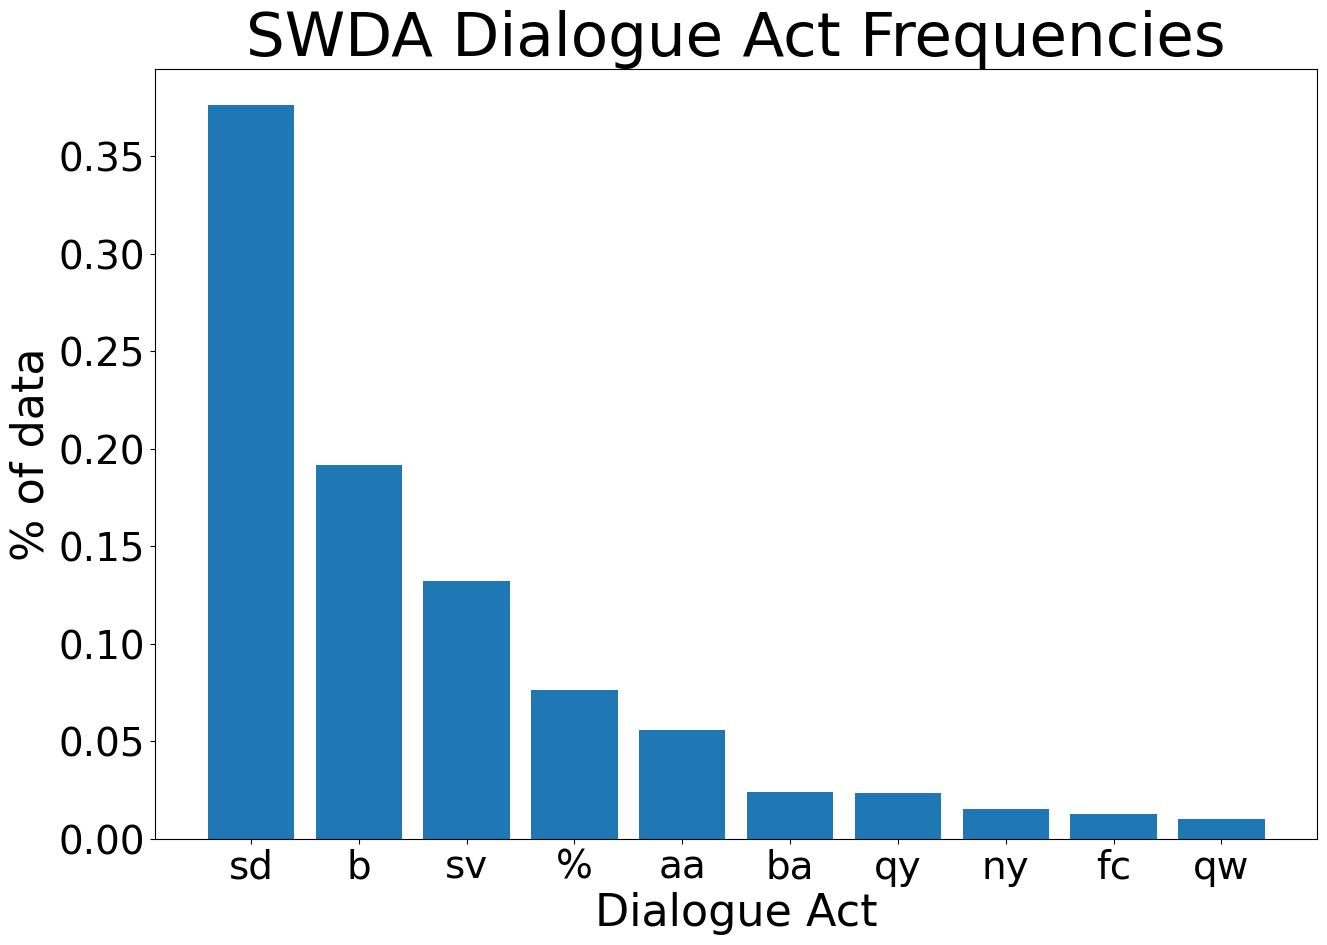

In [22]:
from matplotlib import pyplot as plt

# Figure Size
fig, ax = plt.subplots()
# fig.suptitle("SWDA Label Frequencies", fontsize = 32)

ax.set_title("SWDA Dialogue Act Frequencies", fontsize = 44)
ax.set_xlabel("Dialogue Act", fontsize = 32)
ax.set_ylabel("% of data", fontsize = 32)
ax.figure.set_size_inches(15, 10)
ax.tick_params(axis='both', which='major', labelsize=28)

# Horizontal Bar Plot
ax.bar(labels[:10], freqs[:10])
plt.savefig('label_frequencies.png')

<Figure size 640x480 with 0 Axes>

In [4]:
# df['Label'] = np.where((df['Label'] != "b") & (df['Label'] != "sd") & (df['Label'] != "sv") & (df['Label'] != "%") & (df['Label'] != "aa"), "Other", df['Label'])
# df.head()

In [5]:
df['Label'].value_counts()

sd                 75136
b                  38281
sv                 26421
%                  15195
aa                 11123
ba                  4757
qy                  4725
ny                  3030
fc                  2581
qw                  1976
nn                  1374
bk                  1306
h                   1226
qy^d                1218
bh                  1053
^q                   983
bf                   952
fo_o_fw_"_by_bc      879
na                   847
ad                   745
^2                   723
b^m                  687
qo                   656
qh                   575
^h                   556
ar                   344
ng                   302
br                   298
no                   284
fp                   225
qrr                  209
arp_nd               207
t3                   117
oo_co_cc             110
aap_am               104
t1                   103
bd                   103
^g                    92
qw^d                  80
fa                    79


In [6]:
df['Utterance'] = df['Utterance'].str.lower()
df.head()

,Utterance,Label
0,okay.,"fo_o_fw_""_by_bc"
1,"all right, uh,",b
2,feelings on what caused the s and l crisis,sd
3,i guess i don't have a real technical knowledg...,sd
4,i gather that there where large numbers of sit...,sd


In [7]:
def remove_html(x):
    return BeautifulSoup(x,'html.parser').get_text(separator=" ")

df['Utterance'] = df['Utterance'].apply(lambda x: remove_html(x))
df.head()

,Utterance,Label
0,okay.,"fo_o_fw_""_by_bc"
1,"all right, uh,",b
2,feelings on what caused the s and l crisis,sd
3,i guess i don't have a real technical knowledg...,sd
4,i gather that there where large numbers of sit...,sd


In [8]:
df['Utterance'] = df['Utterance'].str\
                    .replace('[^a-zA-Z ]', '',regex=True)
df['Utterance'] = df['Utterance'].str\
                    .replace('http\S+|www.\S+', '',regex=True)
df.head()

,Utterance,Label
0,okay,"fo_o_fw_""_by_bc"
1,all right uh,b
2,feelings on what caused the s and l crisis,sd
3,i guess i dont have a real technical knowledge...,sd
4,i gather that there where large numbers of sit...,sd


In [9]:
df['Utterance'] = df['Utterance'].apply(lambda x:contractions.fix(x))
df.head()

,Utterance,Label
0,okay,"fo_o_fw_""_by_bc"
1,all right uh,b
2,feelings on what caused the s and l crisis,sd
3,i guess i do not have a real technical knowled...,sd
4,i gather that there where large numbers of sit...,sd


In [10]:
mean_len = df['Utterance'].apply(len).mean()
print("Mean length of utterances after cleaning and preprocessing is", 
      mean_len)

Mean length of utterances after cleaning and preprocessing is 35.03945128667267


In [11]:
#tokenization
tok = spacy.load('en_core_web_sm')
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    text = re.sub('([.,!?()])', r' \1 ', text)
    text = re.sub('\s{2,}', ' ', text)
#     regex = re.compile('[' + '0-9\\r\\t\\n]')
#     text = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(text)]

In [12]:
from collections import Counter
counts = Counter()
for index, row in df.iterrows():
    counts.update(tokenize(row['Utterance']))

In [13]:
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 19838
num_words after: 12865


In [14]:
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [15]:
def encode_sentence(text, vocab2index, N=40):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded

In [16]:
df['encoded'] = df['Utterance'].apply(lambda x: np.array(encode_sentence(x,vocab2index)))
df.head()

,Utterance,Label,encoded
0,okay,"fo_o_fw_""_by_bc","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,all right uh,b,"[3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,feelings on what caused the s and l crisis,sd,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 0, 0, 0, 0..."
3,i guess i do not have a real technical knowled...,sd,"[15, 16, 15, 17, 18, 19, 20, 21, 22, 23, 24, 8..."
4,i gather that there where large numbers of sit...,sd,"[15, 26, 27, 28, 29, 30, 31, 32, 33, 29, 34, 3..."


In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Label'])
df['Label'] = le.transform(df['Label'])

In [18]:
Counter(df['Label'])

Counter({20: 879,
         10: 38281,
         37: 75136,
         14: 952,
         5: 11123,
         35: 4725,
         26: 1374,
         38: 26421,
         0: 15195,
         11: 687,
         4: 983,
         36: 1218,
         27: 284,
         32: 209,
         16: 1306,
         28: 3030,
         12: 4757,
         23: 1226,
         17: 298,
         1: 723,
         31: 656,
         7: 745,
         30: 575,
         6: 104,
         15: 1053,
         33: 1976,
         3: 556,
         29: 110,
         24: 847,
         18: 79,
         19: 2581,
         34: 80,
         25: 302,
         22: 78,
         40: 117,
         8: 344,
         39: 103,
         21: 225,
         2: 92,
         9: 207,
         13: 103})

### Glove

In [19]:
def load_glove_vectors(glove_file="./glove.6B.100d"):
    """Load the glove word vectors"""
    word_vectors = {}
    with open(glove_file) as f:
        for line in f:
            split = line.split()
            word_vectors[split[0]] = np.array([float(x) for x in split[1:]])
    return word_vectors

In [20]:
def get_emb_matrix(pretrained, word_counts, emb_size = 100):
    """ Creates embedding matrix from word vectors"""
    vocab_size = len(word_counts) + 2
    vocab_to_idx = {}
    vocab = ["", "UNK"]
    W = np.zeros((vocab_size, emb_size), dtype="float32")
    W[0] = np.zeros(emb_size, dtype='float32') # adding a vector for padding
    W[1] = np.random.uniform(-0.25, 0.25, emb_size) # adding a vector for unknown words 
    vocab_to_idx["UNK"] = 1
    i = 2
    for word in word_counts:
        if word in word_vecs:
            W[i] = word_vecs[word]
        else:
            W[i] = np.random.uniform(-0.25,0.25, emb_size)
        vocab_to_idx[word] = i
        vocab.append(word)
        i += 1   
    return W, np.array(vocab), vocab_to_idx

In [21]:
word_vecs = load_glove_vectors()
pretrained_weights, vocab, vocab2index = get_emb_matrix(word_vecs, counts)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

shuffled_df = shuffle(df)

x_train, x_test, y_train, y_test = train_test_split(
                    shuffled_df['encoded'], shuffled_df['Label'], 
                    train_size = 0.95, test_size = 0.05, shuffle=True, 
                    stratify = shuffled_df['Label'])

In [23]:
x_train_torch = torch.Tensor(list(x_train))
x_test_torch = torch.Tensor(list(x_test))

In [24]:
y_train = torch.LongTensor(list(y_train)) 
y_test = torch.LongTensor(list(y_test))

In [25]:
zipper = lambda x,y : list(zip(x,y))

In [26]:
x_train_torch = zipper(x_train_torch,y_train) 
x_test_torch = zipper(x_test_torch,y_test)

train_loader = torch.utils.data.DataLoader(x_train_torch, batch_size=16) 
test_loader = torch.utils.data.DataLoader(x_test_torch, batch_size=16)

In [27]:
# from torch.utils.data import Dataset, DataLoader
# class BuildDataset(Dataset):
#     def __init__(self, X, Y):
#         self.X = X
#         self.y = Y
        
#     def __len__(self):
#         return len(self.y)
    
#     def __getitem__(self, idx):
#         print(self.X[idx].astype(np.int32))
#         return torch.from_numpy(self.X[idx].astype(np.int32)), self.y[idx]

In [28]:
# train_ds = BuildDataset(x_train, y_train)
# test_ds = BuildDataset(x_test, y_test)

In [29]:
# batch_size = 5000
# vocab_size = len(words)
# train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
# test_dataloader = DataLoader(test_ds, batch_size=batch_size)

In [30]:
vocab_size = len(words)

In [45]:
import torch.nn as nn
import torch.nn.functional as F
class LSTM_glove_vecs(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim, glove_weights) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.embeddings.weight.data.copy_(torch.from_numpy(glove_weights))
        self.embeddings.weight.requires_grad = False
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 41)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [46]:
model = LSTM_glove_vecs(vocab_size, 100, 50, pretrained_weights)

In [47]:
def train_model(model, epochs=10, lr=0.001, glove = True):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.SGD(parameters, lr=lr)
    min_loss = np.Inf
    model.train()
    for i in range(epochs):
        print(i + 1)
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y in train_loader:
            x = x.long()
            y = y.long()
            y_pred = model(x)
            optimizer.zero_grad()
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, min_loss = validation_metrics(model, test_loader, min_loss, glove)
        print("train loss %.3f, val loss %.3f, val accuracy %.3f" % (sum_loss/total, val_loss, val_acc))

def validation_metrics (model, valid_dl, min_loss, glove = True):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x, y in valid_dl:
        x = x.long()
        y = y.long()
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)
        pred = torch.max(y_hat, 1)[1]
        correct += (pred == y).float().sum()
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
    if sum_loss / total <= min_loss:
        print('Validation loss decreased ({:.6f} --> {:.6f}).Saving model ...'.format(min_loss, (sum_loss / total)))
        model_scripted = torch.jit.script(model)
        if glove:
            model_scripted.save("glove_6b_100.pt")
        else:
            model_scripted.save("glove_twitter.pt")
        min_loss = sum_loss/total

    return sum_loss/total, correct/total, min_loss

In [54]:
def evaluate(model_file):

    model = torch.jit.load(model_file)
    model.eval()

    pred_list = torch.zeros(0, dtype=torch.long)
    target_list = torch.zeros(0, dtype=torch.long)
    train_count = 0
    count = 0

    train_pred_list = torch.zeros(0, dtype=torch.long)
    train_target_list = torch.zeros(0, dtype=torch.long)

    for x, y in train_loader:
        x = x.long()
        y = y.long()
        y_hat = model(x)
        pred = torch.max(y_hat, 1)[1]
        train_pred_list = torch.cat([train_pred_list, pred])
        train_target_list = torch.cat([train_target_list, y])

    train_result = classification_report(train_pred_list.numpy(), 
                                         train_target_list.numpy())
    print("Training Classification report: \n", train_result)

    for x, y in test_loader:
        x = x.long()
        y = y.long()
        y_hat = model(x)
        pred = torch.max(y_hat, 1)[1]
        pred_list = torch.cat([pred_list, pred])
        target_list = torch.cat([target_list, y])
    pred = classification_report(pred_list.numpy(), 
                                         target_list.numpy(), output_dict = True)
    report = pd.DataFrame(pred).transpose()
    report
    print("Testing Classification report: \n", report)

In [49]:
train_model(model, epochs=50, lr=0.1)

1
Validation loss decreased (inf --> 1.301185).Saving model ...
train loss 1.671, val loss 1.301, val accuracy 0.618
2
Validation loss decreased (1.301185 --> 1.175381).Saving model ...
train loss 1.246, val loss 1.175, val accuracy 0.653
3
Validation loss decreased (1.175381 --> 1.094887).Saving model ...
train loss 1.156, val loss 1.095, val accuracy 0.668
4
Validation loss decreased (1.094887 --> 1.067345).Saving model ...
train loss 1.115, val loss 1.067, val accuracy 0.678
5
Validation loss decreased (1.067345 --> 0.978074).Saving model ...
train loss 1.038, val loss 0.978, val accuracy 0.702
6
Validation loss decreased (0.978074 --> 0.941460).Saving model ...
train loss 0.991, val loss 0.941, val accuracy 0.711
7
Validation loss decreased (0.941460 --> 0.924831).Saving model ...
train loss 0.962, val loss 0.925, val accuracy 0.711
8
train loss 1.047, val loss 0.967, val accuracy 0.701
9
train loss 0.971, val loss 0.937, val accuracy 0.712
10
Validation loss decreased (0.924831 --

In [55]:
evaluate("glove_6b_100.pt")

Training Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     14528
           1       0.04      0.23      0.07       121
           2       0.00      0.00      0.00         0
           3       0.40      0.67      0.50       313
           4       0.00      0.00      0.00         0
           5       0.33      0.56      0.42      6225
           6       0.00      0.00      0.00         0
           7       0.34      0.44      0.38       556
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.94      0.75      0.83     45382
          11       0.13      0.20      0.15       419
          12       0.75      0.75      0.75      4564
          13       0.38      0.73      0.50        51
          14       0.00      0.00      0.00         0
          15       0.81      0.54      0.65      1480
          16       0.34      0.58      0.43    

In [67]:
import gensim.downloader as api
wv = api.load('glove-twitter-100')

In [68]:
# def load_w2v_vectors():
#     """Load the glove word vectors"""
#     word_vectors = {}
#     with open(glove_file) as f:
#         for line in f:
#             split = line.split()
#             word_vectors[split[0]] = np.array([float(x) for x in split[1:]])
#     return word_vectors

In [69]:
def get_w2v_emb_matrix(pretrained, word_counts, emb_size = 100):
    """ Creates embedding matrix from word vectors"""
    vocab_size = len(word_counts) + 2
    vocab_to_idx = {}
    vocab = ["", "UNK"]
    W = np.zeros((vocab_size, emb_size), dtype="float32")
    W[0] = np.zeros(emb_size, dtype='float32') # adding a vector for padding
    W[1] = np.random.uniform(-0.25, 0.25, emb_size) # adding a vector for unknown words 
    vocab_to_idx["UNK"] = 1
    i = 2
    for word in word_counts:
        if word in wv.key_to_index.keys():
            W[i] = wv[word]
        else:
            W[i] = np.random.uniform(-0.25,0.25, emb_size)
        vocab_to_idx[word] = i
        vocab.append(word)
        i += 1   
    return W, np.array(vocab), vocab_to_idx

In [70]:
w2v_pretrained_weights, vocab, vocab2index = get_w2v_emb_matrix(word_vecs, counts)

In [71]:
import torch.nn as nn
import torch.nn.functional as F
class LSTM_w2v_vecs(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim, w2v_weights) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.embeddings.weight.data.copy_(torch.from_numpy(w2v_weights))
#         self.embeddings.weight.requires_grad = False
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, num_layers = 2)
        self.linear = nn.Linear(hidden_dim, 41)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [74]:
model = LSTM_w2v_vecs(vocab_size, 100, 50, w2v_pretrained_weights)

In [75]:
train_model(model, epochs=50, lr=0.1, glove = False)

1
Validation loss decreased (inf --> 1.367780).Saving model ...
train loss 1.743, val loss 1.368, val accuracy 0.604
2
Validation loss decreased (1.367780 --> 1.113084).Saving model ...
train loss 1.280, val loss 1.113, val accuracy 0.666
3
Validation loss decreased (1.113084 --> 0.987715).Saving model ...
train loss 1.061, val loss 0.988, val accuracy 0.701
4
Validation loss decreased (0.987715 --> 0.946210).Saving model ...
train loss 0.978, val loss 0.946, val accuracy 0.714
5
Validation loss decreased (0.946210 --> 0.915899).Saving model ...
train loss 0.934, val loss 0.916, val accuracy 0.720
6
Validation loss decreased (0.915899 --> 0.898826).Saving model ...
train loss 0.907, val loss 0.899, val accuracy 0.721
7
Validation loss decreased (0.898826 --> 0.878725).Saving model ...
train loss 0.889, val loss 0.879, val accuracy 0.728
8
Validation loss decreased (0.878725 --> 0.869591).Saving model ...
train loss 0.874, val loss 0.870, val accuracy 0.730
9
Validation loss decreased (

In [76]:
evaluate("glove_twitter.pt")

Training Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81     15549
           1       0.22      0.31      0.25       485
           2       0.08      0.58      0.14        12
           3       0.50      0.71      0.59       371
           4       0.00      0.00      0.00         2
           5       0.33      0.58      0.42      5965
           6       0.04      0.07      0.05        54
           7       0.52      0.50      0.51       729
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.94      0.75      0.84     45281
          11       0.21      0.31      0.25       436
          12       0.74      0.80      0.77      4198
          13       0.47      0.62      0.53        74
          14       0.02      0.22      0.03        68
          15       0.84      0.54      0.66      1542
          16       0.30      0.63      0.41    

In [ ]:
# def average_reviews(line):
#     review = line.split(" ") 
#     sum_array = np.zeros((300,)) 
#     for word in review:
#         if word in wv.key_to_index.keys(): 
#             sum_array += wv[word]
#     return sum_array/len(review)

In [ ]:
# x_train = x_train.apply(lambda x: average_reviews(x))

In [ ]:
# x_test = x_test.apply(lambda x: average_reviews(x))

In [ ]:
# model = LinearSVC()

# model.fit(list(x_train.values), y_train)
# pred = model.predict(list(x_test.values))
# pred = classification_report(y_test, pred, output_dict=True)
# report = pd.DataFrame(pred).transpose()
# report

In [ ]:
# def convert_word2vec(utterance):
#     splits = utterance.split(" ")
#     feature = []
#     count = 0
#     for word in splits:
#         if count < 30:
#             if word in wv.key_to_index.keys():
#                 feature.append(wv[word])
#             else:
#                 feature.append(np.array([0]*300))
#         count += 1
#     if count < 30:
#         temp = np.array([0]*300) 
#         for x in range(count,30):
#             feature.append(temp)
#     return feature

In [ ]:
# x_train = x_train.apply(lambda x:convert_word2vec(x))
# x_test = x_test.apply(lambda x:convert_word2vec(x))

In [ ]:
# x_train_torch = torch.Tensor(list(x_train))
# x_test_torch = torch.Tensor(list(x_test))

In [ ]:
# from sklearn import preprocessing

# le = preprocessing.LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)

In [ ]:
# y_train = torch.LongTensor(list(y_train)) 
# y_test = torch.LongTensor(list(y_test))

In [ ]:
# zipper = lambda x,y : list(zip(x,list(y)))

In [ ]:
# x_train_torch = zipper(x_train_torch,y_train) 
# x_test_torch = zipper(x_test_torch,y_test)

# train_loader = torch.utils.data.DataLoader(x_train_torch, batch_size=16) 
# test_loader = torch.utils.data.DataLoader(x_test_torch, batch_size=16)

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module): 
    
#     def __init__(self):
#         super(Net, self).__init__() 
#         hidden_1 = 100
#         hidden_2 = 100
#         hidden_3 = 50
#         self.rnn1 = nn.RNN(input_size=300, hidden_size=hidden_1, 
#                           batch_first=True) 
# #         self.rnn2 = nn.RNN(input_size=hidden_1, hidden_size=hidden_2, 
# #                           batch_first=True)
# #         self.fc1 = nn.Linear(hidden_2, hidden_3)
#         self.fc2 = nn.Linear(hidden_1, 6)
#         self.relu = nn.ReLU()
    
#     def forward(self, x):
#         out, hn = self.rnn1(x, torch.randn(1, len(x), 100))
# #         out, hn = self.rnn2(out, torch.randn(1, len(x), 100))
#         out = self.fc2(out[:, -1])
# #         out = self.fc2(out)
#         return out

In [ ]:
# rnn_model = Net()
# print(rnn_model)

In [ ]:
# # specify loss function (categorical cross-entropy)
# criterion = nn.CrossEntropyLoss()
# # specify optimizer (stochastic gradient descent) and learning rate = 0.01
# optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.01)
# # optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.01)

In [ ]:
# # number of epochs to train the model
# n_epochs = 100

# # initialize tracker for minimum validation loss
# valid_loss_min = np.Inf # set initial "min" to infinity

# for epoch in range(n_epochs):
#     # monitor training loss
#     train_loss = 0.0
#     valid_loss = 0.0
    
#     ###################
#     # train the model #
#     ###################
#     rnn_model.train() # prep model for training
#     for data, target in train_loader:
#         # clear the gradients of all optimized variables
#         optimizer.zero_grad()
#         # forward pass: compute predicted outputs by passing inputs to the model
#         output = rnn_model(data)
#         # calculate the loss
#         loss = criterion(output, target)
#         # backward pass: compute gradient of the loss with respect to model parameters
#         loss.backward()
#         # perform gradient clipping to deal with exploding/vanishing gradients
#         torch.nn.utils.clip_grad_norm_(rnn_model.parameters(), 
#                                        max_norm=2.0, norm_type=2)        
#         # perform a single optimization step (parameter update)
#         optimizer.step()
#         # update running training loss
#         train_loss += loss.item()*data.size(0)
        
#     rnn_model.eval() # prep model for evaluation
#     for data, target in test_loader:
#         # forward pass: compute predicted outputs by passing inputs to the model
#         output = rnn_model(data)
#         # calculate the loss
#         loss = criterion(output, target)
#         # update running validation loss 
#         valid_loss += loss.item()*data.size(0)
        
#     # print training/validation statistics 
#     # calculate average loss over an epoch
#     train_loss = train_loss/len(train_loader.dataset)
#     valid_loss = valid_loss/len(test_loader.dataset)
    
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}' \
#           .format(epoch+1, train_loss, valid_loss))
    
#     # save model if validation loss has decreased
#     if valid_loss <= valid_loss_min:
#         print('Validation loss decreased ({:.6f} --> {:.6f}). \
#         Saving model ...'.format(valid_loss_min, valid_loss))
        
#         torch.save(rnn_model.state_dict(), 'model_rnn.pt')
#         valid_loss_min = valid_loss
        

In [ ]:
# rnn_model = Net()
# rnn_model.load_state_dict(torch.load("model_rnn.pt"))
# rnn_model.eval()

# pred_list = torch.zeros(0, dtype=torch.long)
# target_list = torch.zeros(0, dtype=torch.long)
# train_count = 0
# count = 0

# train_pred_list = torch.zeros(0, dtype=torch.long)
# train_target_list = torch.zeros(0, dtype=torch.long)

# for data, target in train_loader:
#     output = rnn_model(data)
#     _, preds = torch.max(output, 1) 
#     train_pred_list = torch.cat([train_pred_list, preds.view(-1)])
#     train_target_list = torch.cat([train_target_list, target.view(-1)])
#     for x in range(16):
#         if preds[x] == target[x]: 
#             train_count+=1
            
# print("Training Accuracy =", train_count / len(train_loader.dataset))
# train_result = classification_report(train_pred_list.numpy(), 
#                                      train_target_list.numpy())
# print("Training Classification report: \n", train_result)
            
# for data, target in test_loader:
#     output = rnn_model(data)
#     _, preds = torch.max(output, 1) 
#     pred_list = torch.cat([pred_list, preds.view(-1)])
#     target_list = torch.cat([target_list, target.view(-1)])
#     for x in range(16):
#         if preds[x] == target[x]: 
#             count+=1

# print("Testing Accuracy =", count / len(test_loader.dataset))

# result = classification_report(pred_list.numpy(), target_list.numpy())
# print("Testing Classification report: \n", result)

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module): 
    
#     def __init__(self):
#         super(Net, self).__init__() 
#         hidden_1 = 100
#         hidden_2 = 100
#         hidden_3 = 50
#         self.gru = nn.GRU(input_size=300, hidden_size=hidden_1, 
#                           batch_first=True) 
# #         self.rnn2 = nn.RNN(input_size=hidden_1, hidden_size=hidden_2, 
# #                           batch_first=True)
# #         self.fc1 = nn.Linear(hidden_2, hidden_3)
#         self.fc2 = nn.Linear(hidden_1, 41)
#         self.relu = nn.ReLU()
    
#     def forward(self, x):
#         out, hn = self.gru(x, torch.randn(1, len(x), 100))
# #         out, hn = self.rnn2(out, torch.randn(1, len(x), 100))
#         out = self.fc2(self.relu(out[:, -1]))
# #         out = self.fc2(out)
#         return out

In [ ]:
# gru_model = Net()
# print(gru_model)

In [ ]:
# # specify loss function (categorical cross-entropy)
# criterion = nn.CrossEntropyLoss()
# # specify optimizer (stochastic gradient descent) and learning rate = 0.01
# optimizer = torch.optim.SGD(gru_model.parameters(), lr=0.01)
# # optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.01)

In [ ]:
# # number of epochs to train the model
# n_epochs = 100

# # initialize tracker for minimum validation loss
# valid_loss_min = np.Inf # set initial "min" to infinity

# for epoch in range(n_epochs):
#     # monitor training loss
#     train_loss = 0.0
#     valid_loss = 0.0
    
#     ###################
#     # train the model #
#     ###################
#     gru_model.train() # prep model for training
#     for data, target in train_loader:
#         # clear the gradients of all optimized variables
#         optimizer.zero_grad()
#         # forward pass: compute predicted outputs by passing inputs to the model
#         output = gru_model(data)
#         # calculate the loss
#         loss = criterion(output, target)
#         # backward pass: compute gradient of the loss with respect to model parameters
#         loss.backward()       
#         # perform a single optimization step (parameter update)
#         optimizer.step()
#         # update running training loss
#         train_loss += loss.item()*data.size(0)
        
#     gru_model.eval() # prep model for evaluation
#     for data, target in test_loader:
#         # forward pass: compute predicted outputs by passing inputs to the model
#         output = gru_model(data)
#         # calculate the loss
#         loss = criterion(output, target)
#         # update running validation loss 
#         valid_loss += loss.item()*data.size(0)
        
#     # print training/validation statistics 
#     # calculate average loss over an epoch
#     train_loss = train_loss/len(train_loader.dataset)
#     valid_loss = valid_loss/len(test_loader.dataset)
    
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}' \
#           .format(epoch+1, train_loss, valid_loss))
    
#     # save model if validation loss has decreased
#     if valid_loss <= valid_loss_min:
#         print('Validation loss decreased ({:.6f} --> {:.6f}). \
#         Saving model ...'.format(valid_loss_min, valid_loss))
        
#         torch.save(gru_model.state_dict(), 'model_gru.pt')
#         valid_loss_min = valid_loss
        

In [ ]:
# gru_model = Net()
# gru_model.load_state_dict(torch.load("model_gru.pt"))
# gru_model.eval()

# pred_list = torch.zeros(0, dtype=torch.long)
# target_list = torch.zeros(0, dtype=torch.long)
# train_count = 0
# count = 0

# train_pred_list = torch.zeros(0, dtype=torch.long)
# train_target_list = torch.zeros(0, dtype=torch.long)

# for data, target in train_loader:
#     output = gru_model(data)
#     _, preds = torch.max(output, 1) 
#     train_pred_list = torch.cat([train_pred_list, preds.view(-1)])
#     train_target_list = torch.cat([train_target_list, target.view(-1)])
# #     for x in range(16):
# #         if preds[x] == target[x]: 
# #             train_count+=1
            
# # print("Training Accuracy =", train_count / len(train_loader.dataset))
# train_result = classification_report(train_pred_list.numpy(), 
#                                      train_target_list.numpy())
# print("Training Classification report: \n", train_result)
            
# for data, target in test_loader:
#     output = gru_model(data)
#     _, preds = torch.max(output, 1) 
#     pred_list = torch.cat([pred_list, preds.view(-1)])
#     target_list = torch.cat([target_list, target.view(-1)])
# #     for x in range(16):
# #         if preds[x] == target[x]: 
# #             count+=1

# # print("Testing Accuracy =", count / len(test_loader.dataset))

# result = classification_report(pred_list.numpy(), target_list.numpy())
# print("Testing Classification report: \n", result)